In [84]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [85]:
def entropy_calc(p_j):
    entropy = 0
    for p in p_j:
        entropy -= p*np.log2(p)
    return entropy

def BlahutArimato(dist_mat, p_x, beta ,max_it = 100,eps = 1e-10) :
    """Compute the rate-distortion function of an i.i.d distribution
    Inputs :
        'dist_mat' -- (numpy matrix) representing the distoriton matrix between the input 
            alphabet and the reconstruction alphabet. dist_mat[i,j] = dist(x[i],x_hat[j])
        'p_x' -- (1D numpy array) representing the probability mass function of the source
        'beta' -- (scalar) the slope of the rate-distoriton function at the point where evaluation is 
                    required
        'max_it' -- (int) maximal number of iterations
        'eps' -- (float) accuracy required by the algorithm: the algorithm stops if there
                is no change in distoriton value of more than 'eps' between consequtive iterations
    Returns :
        'Iu' -- rate (in bits)
        'Du' -- distortion
        
    ORIGINAL CODE FROM: https://github.com/alonkipnis/BlahutArimoto/blob/master/BlahutArimoto.py
    Only small edits were made for this exam
    """
    import numpy as np

    l,l_hat = dist_mat.shape
    p_cond = np.tile(p_x, (l_hat,1)).T #start with iid conditional distribution

    p_x = p_x / np.sum(p_x) #normalize
    p_cond /= np.sum(p_cond,1,keepdims=True)

    it = 0
    Du_prev = 0
    Du = 2*eps
    while it < max_it and np.abs(Du-Du_prev)> eps :
        it+=1
        Du_prev = Du
        p_hat = np.matmul(p_x,p_cond)

        p_cond = np.exp(-beta * dist_mat) * p_hat
        p_cond /= np.expand_dims(np.sum(p_cond,1),1)
        
        Iu = np.matmul(p_x,p_cond*np.log(p_cond / np.expand_dims(p_hat,0))).sum()
        Du = np.matmul(p_x,(p_cond * dist_mat)).sum()
    
    return Iu/np.log(2), Du

In [86]:
j = range(-100,101)
p_j = [(2**-abs(x))/float(3) for x in j]

thetas = np.arange(0.0001,.5,.001)
rho = np.zeros((len(j),len(j)))
for i in range(len(j)):
    for k in range(len(j)):
        rho[i,k] = abs(i-k)

print "Index j from -100 to 100"
print "Subset of P_j \n", np.round(p_j[97:104],3)
print "Susbset Distortion Matrix \n", rho

Index j from -100 to 100
Subset of P_j 
[0.042 0.083 0.167 0.333 0.167 0.083 0.042]
Susbset Distortion Matrix 
[[  0.   1.   2. ... 198. 199. 200.]
 [  1.   0.   1. ... 197. 198. 199.]
 [  2.   1.   0. ... 196. 197. 198.]
 ...
 [198. 197. 196. ...   0.   1.   2.]
 [199. 198. 197. ...   1.   0.   1.]
 [200. 199. 198. ...   2.   1.   0.]]


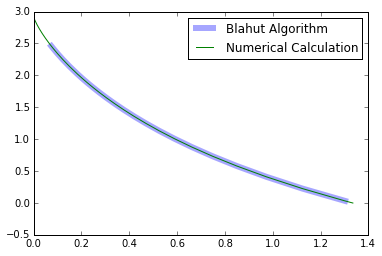

In [93]:
np.warnings.filterwarnings('ignore')
rates = []
distortion = []
lambdas = np.arange(0.2,250,.1)
for i in lambdas:
    R,D = BlahutArimato(rho,p_j,i)
    rates.append(R)
    distortion.append(D)
    

plt.plot(distortion,rates,label='Blahut Algorithm',linewidth=6,alpha=0.35)

R_D = []
for D in distortion:
    theta = (np.sqrt(D**2 + 1) - 1) / D    
    R_D.append( entropy_calc(p_j) + D * np.log2(theta) + np.log2((1-theta)/(1+theta)) )

plt.plot(distortion,R_D,label='Numerical Calculation')
plt.legend()
plt.show()

As is shown, the Blahut algorithm and numerical calculations both give the same value for all values of D.